<h1>Importación de librerías</h1>

In [1]:
#Importar librerias necesarias para la limpieza, analisis y graficas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Definición de clases y funciones

In [30]:
class ExtraerLigando:
    def __init__(self, dataframe, ligando):
        self.dataframe = dataframe
        self.ligando = ligando
    
    def extraer_ligando(self):
        ligando = self.dataframe.loc[self.dataframe['FNQ'] == self.ligando]
        return ligando
    
    def extraer_modo(self, modo):
        modo_ligando = self.extraer_ligando().loc[self.dataframe['Mode'] == modo]  
        return modo_ligando
    
    def extraer_modos(self, modos): # Para tener todos los modos de fnq en una sola lista
        ligando_modos = []
        for modo in modos:
            ligando_modos.append(self.extraer_modo(modo))
        return ligando_modos

    
class Procesar_datos:
    
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
    def promedio_intervalos(self, columna, intervalo=100):
        contador = 0
        resultado = 0
        distancia_promedio = []
        frames_acumulados = []
        multiplo = 1
        for numero in self.dataframe[columna]:
            resultado += numero
            if contador == 0:
                distancia_promedio.append(round(numero, 3))
                frames_acumulados.append(contador)
            elif contador == intervalo:
                resultado += numero
                resultado /= intervalo
                distancia_promedio.append(round(resultado, 3))
                frames_acumulados.append(multiplo)
                multiplo += 1
                contador = 0
                resultado = 0
            contador += 1
        return (frames_acumulados, distancia_promedio)
    
    
def graficar_distancias_modos(modo_ligando_lista, titulo):
    """Grafica las distancia a los atomos seleccionados"""
    for modo_ligando in modo_ligando_lista:
        sns.lineplot(modo_ligando[0], modo_ligando[1])
    plt.title(titulo)
    plt.legend( ('d1', 'd2', 'd3', 'd4'), loc = 'upper center', ncol = 4, fontsize =13)
    plt.xlabel('Tiempo (ns)', fontsize = 14)
    plt.ylabel('Distancia (Å)', fontsize = 14)
    plt.axis([0, 200, 0, 12])
    plt.show()
    

def distancias(lista_modos):
    distancias_modos = []
    for fnq in lista_modos:
        procesar = Procesar_datos(fnq)
        distancias = ['c3a', 'c4a', 'c8a', 'c9a']
        for modo in distancias:
            distancias_modos.append(procesar.promedio_intervalos(modo, 100))
    return distancias_modos

<h1> Manejo y gráfica de los datos en bruto </h1>

<h1>Carga y vista de archivo</h1>

In [31]:
# cargar archivo con todos los datos en bruto
archivo = '../dynamics_deep_learning/fnq_ieAll_dist_23_11_2020.csv'
data = pd.read_csv(archivo)
data

,FNQ,Mode,FAD603,GLY174,GLY149,GLY150,HIS161,HIS194,ILE175,MET154,...,TRP105,TYR126,TYR128,TYR132,TYR155,c3a,c4a,c8a,c9a,Clases
0,f02,A,-8.7141,-0.1704,-2.7875,-3.8715,-1.7793,-1.6273,0.5050,-0.3570,...,-2.4246,-6.8892,-6.6050,-0.1702,-0.6156,4.841926,6.949417,6.697532,4.506666,0
1,f02,A,-13.5880,-0.1742,-2.4840,-3.5248,-1.3798,-1.6182,0.2493,-0.1965,...,-4.6140,-7.8796,-6.0860,-0.1599,-0.4961,5.247896,7.253421,7.015784,4.853720,0
2,f02,A,-20.2759,-0.2783,-2.2637,-2.8734,-2.1737,-0.8822,-1.1171,-0.6480,...,-4.9247,-6.0456,-6.1143,-0.3969,-1.1514,4.448258,5.318084,4.480996,3.446740,0
3,f02,A,-17.7106,-0.3162,-2.5086,-4.1735,-1.7645,-0.0882,-0.4480,-0.0500,...,-5.2485,-2.5794,-5.3113,-0.1789,-2.3238,4.796912,5.963597,5.105779,3.755657,0
4,f02,A,-18.8438,-0.3296,-2.6057,-5.0689,-2.6301,-0.1056,-2.1089,-0.1885,...,-4.6007,-2.1418,-6.6751,-0.3209,-2.3338,4.714074,5.614448,4.605678,3.551290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240019,f17,Bp,-15.9087,-0.0364,-2.7475,-2.3726,-1.2350,-0.8801,-0.8116,-0.2393,...,-5.1762,-5.6302,-0.6025,-0.1743,-0.5384,5.602408,3.766762,4.074519,5.792861,2
240020,f17,Bp,-17.4237,-0.0987,-2.5380,-2.6380,-1.4974,-0.7897,-0.5212,-0.2323,...,-5.8914,-5.0179,-0.2373,-0.2018,-0.1699,5.352695,3.479701,3.850210,5.593554,2
240021,f17,Bp,-14.9774,-0.0418,-1.9892,-1.3227,-1.7149,-0.4025,-0.7731,-0.2588,...,-3.6216,-5.6760,-0.4571,-0.1987,-0.4811,5.725673,3.566879,3.828185,5.919232,2
240022,f17,Bp,-16.1544,-0.0593,-2.6483,-2.7038,-2.2877,-0.4187,-0.4247,-0.3317,...,-5.1631,-6.6789,-0.3889,-0.1769,-0.3419,5.601152,3.678952,3.856498,5.717436,2


In [32]:
modos = ['A', 'Ap', 'B', 'Bp']
# Modos de fnq2
f02 = ExtraerLigando(data, 'f02')
f02_modos = f02.extraer_modos(modos)

# Modos de fnq10
f10 = ExtraerLigando(data, 'f10')
f10_modos = f10.extraer_modos(modos)

# Modos de fnq17
f17 = ExtraerLigando(data, 'f17')
f17_modos = f17.extraer_modos(modos)

# procesando FNQ2
f02_distancias_modos = []
distancias = ['c3a', 'c4a', 'c8a', 'c9a']

for fnq in f02_modos:
    procesar = Procesar_datos(fnq)
    for modo in distancias:
        f02_distancias_modos.append(procesar.promedio_intervalos(modo, 100))
        
# procesando FNQ10
f10_distancias_modos = []
for fnq in f10_modos:
    procesar = Procesar_datos(fnq)
    for modo in distancias:
        f10_distancias_modos.append(procesar.promedio_intervalos(modo, 100))
        
# procesando FNQ17
f17_distancias_modos = []
for fnq in f17_modos:
    procesar = Procesar_datos(fnq)
    for modo in distancias:
        f17_distancias_modos.append(procesar.promedio_intervalos(modo, 100))
    

# Gráficas FNQ2, datos crudos

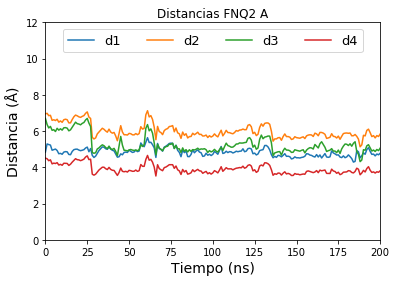

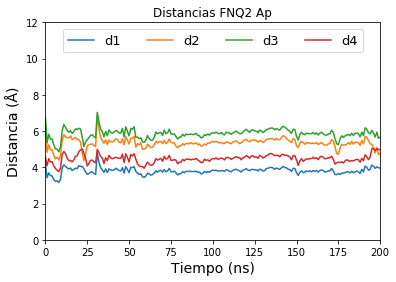

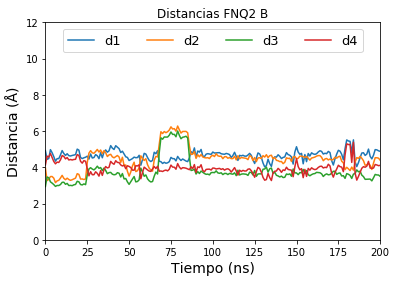

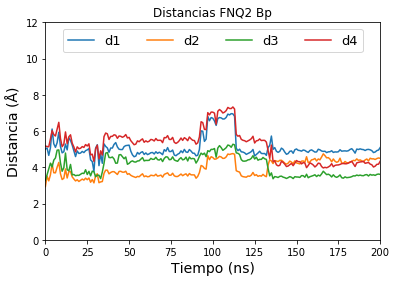

In [33]:
# Distancias a carbonos

lista_modos_f02_A = f02_distancias_modos[0:4]
graficar_distancias_modos(lista_modos_f02_A, 'Distancias FNQ2 A')

lista_modos_f02_Ap = f02_distancias_modos[4:8]
graficar_distancias_modos(lista_modos_f02_Ap, 'Distancias FNQ2 Ap')

lista_modos_f02_B = f02_distancias_modos[8:12]
graficar_distancias_modos(lista_modos_f02_B, 'Distancias FNQ2 B')

lista_modos_f02_Bp = f02_distancias_modos[12:16]
graficar_distancias_modos(lista_modos_f02_Bp, 'Distancias FNQ2 Bp')

# Gráficas FNQ10, datos crudos

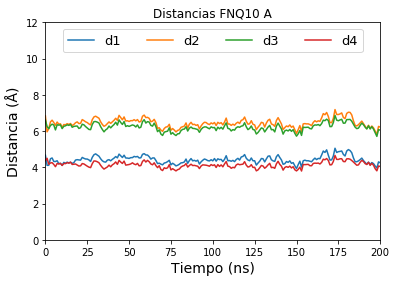

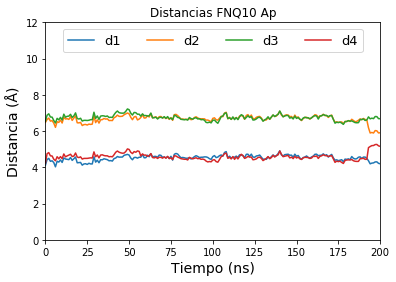

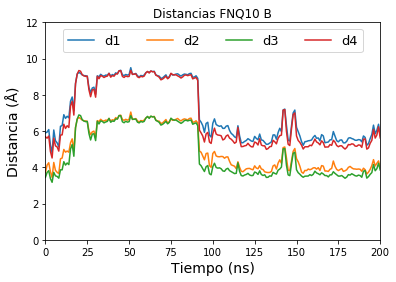

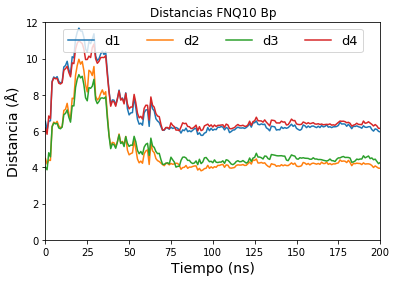

In [34]:
# Distancias a carbonos

lista_modos_f10_A = f10_distancias_modos[0:4]
graficar_distancias_modos(lista_modos_f10_A, 'Distancias FNQ10 A')

lista_modos_f10_Ap = f10_distancias_modos[4:8]
graficar_distancias_modos(lista_modos_f10_Ap, 'Distancias FNQ10 Ap')

lista_modos_f10_B = f10_distancias_modos[8:12]
graficar_distancias_modos(lista_modos_f10_B, 'Distancias FNQ10 B')

lista_modos_f10_Bp = f10_distancias_modos[12:16]
graficar_distancias_modos(lista_modos_f10_Bp, 'Distancias FNQ10 Bp')

# Gráficas FNQ17, datos crudos

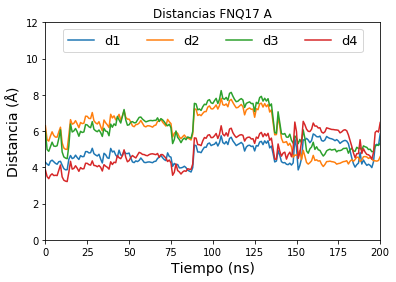

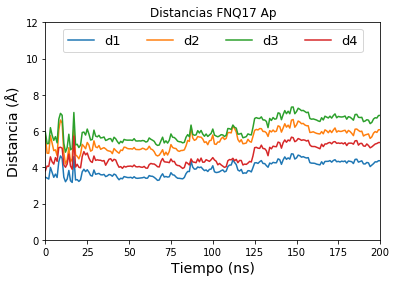

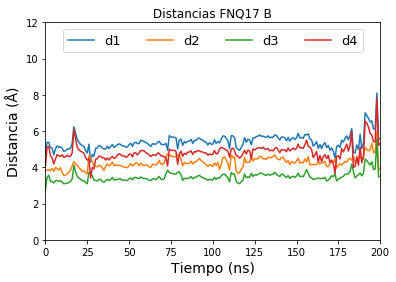

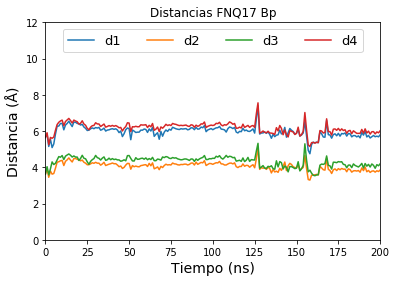

In [35]:
# Distancias a carbonos

lista_modos_f17_A = f17_distancias_modos[0:4]
graficar_distancias_modos(lista_modos_f17_A, 'Distancias FNQ17 A')

lista_modos_f17_Ap = f17_distancias_modos[4:8]
graficar_distancias_modos(lista_modos_f17_Ap, 'Distancias FNQ17 Ap')

lista_modos_f17_B = f17_distancias_modos[8:12]
graficar_distancias_modos(lista_modos_f17_B, 'Distancias FNQ17 B')

lista_modos_f17_Bp = f17_distancias_modos[12:16]
graficar_distancias_modos(lista_modos_f17_Bp, 'Distancias FNQ17 Bp')

<h1>Funciones para tratamiento de outliers en los datos</h1>

In [36]:
def agrupar_fnq(dataframe, fnq):
    data_grouped = data.groupby('FNQ')
    return data_grouped.get_group(fnq)

def aplicar_zscore(dataframeEntrada, criterio, metodo=0):
    dataframe = dataframeEntrada.iloc[:,2:-1]
    score = dataframe.apply(zscore)
    if metodo == 0:
         dataframe_mean = dataframe.median()
    elif metodo == 1:
        dataframe_mean = dataframe.mean()
    
    dataframe = dataframe.where(score <= criterio, dataframe_mean, axis=1)
    dataframe = dataframe.where(score >= -criterio, dataframe_mean, axis=1)
    dataframe = pd.concat([dataframeEntrada.iloc[:, 0:2], dataframe, dataframeEntrada.iloc[:, -1]], axis=1)
    return (dataframe, score)

def nuevo_archivo_individual(dataframe, nombre):
    nombre = nombre + '_outliersCorrection.csv'
    dataframe.to_csv(nombre)
    
def nuevo_archivo_total(dataframe_list, nombre):
    dataframe = pd.concat(dataframe_list)
    #return dataframe
    nombre = nombre + '.csv'
    dataframe.to_csv(nombre)

<h1>Eliminación de outliers y creación de nuevos archivos</h1>

In [40]:
f02 = agrupar_fnq(data, 'f02')
f10 = agrupar_fnq(data, 'f10')
f17 = agrupar_fnq(data, 'f17')
# aplicamos z score
f02_mediana, f02_zscore = aplicar_zscore(f02, 3)
f02_media, f02_zscore = aplicar_zscore(f02, 3, 1)

f10_mediana, f10_zscore = aplicar_zscore(f10, 3)
f10_media, f10_zscore = aplicar_zscore(f10, 3, 1)

f17_mediana, f17_zscore = aplicar_zscore(f17, 3)
f17_media, f17_zscore = aplicar_zscore(f17, 3, 1)


# Un solo archivo
dataframes = [f02_mediana, f10_mediana, f17_mediana]
nuevo_archivo_total(dataframes, 'mediana_fnq_ieAll_outliersCorrection')

# Archivos separados
nuevo_archivo_individual(dataframes[0], 'f02')
nuevo_archivo_individual(dataframes[1], 'f10')
nuevo_archivo_individual(dataframes[2], 'f17')
print()

<h1><b>La mayoría de los datos presenta una distribución normal</b></h1>
<h1>Comparación de distribución de datos con outliers y sin outliers</h1>

In [41]:
def graficarDistribucionEnergias(dataframe, title):
    columns = dataframe.columns
    columns = columns[2:-5]
    for column in columns:
        sns.distplot(dataframe[column])
    #plt.legend(columns)
    plt.title(title)
    plt.xlabel('Residuos')
    plt.ylabel('Energia de interacción')

    plt.show()
    
# Titulos
a = 'Distribución antes'
dm = 'Distribución después mediana'
dp = 'Distribución después media'


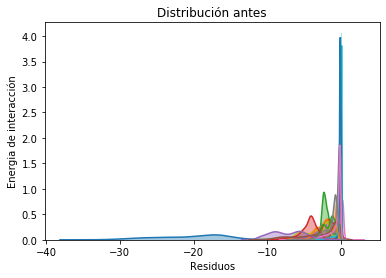

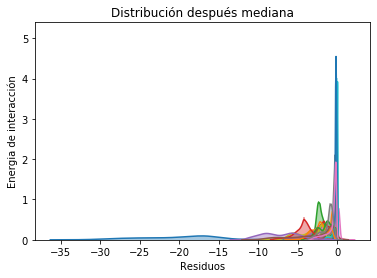

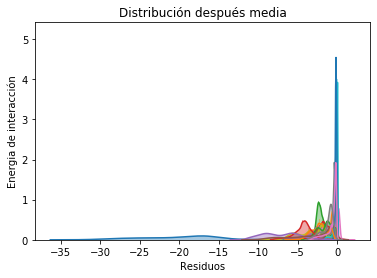

In [42]:
graficarDistribucionEnergias(f02, a)
graficarDistribucionEnergias(f02_mediana, dm)
graficarDistribucionEnergias(f02_media, dp)

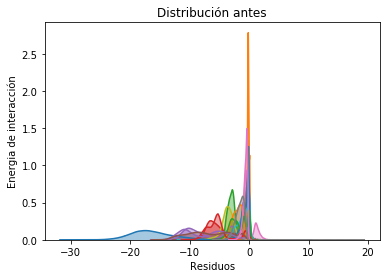

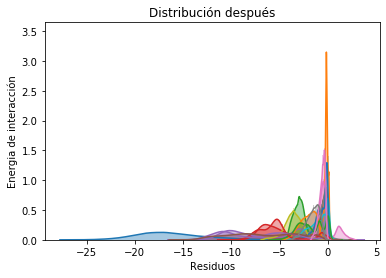

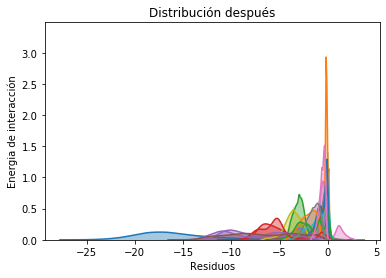

In [43]:
graficarDistribucionEnergias(f10, a)
graficarDistribucionEnergias(f10_mediana, d)
graficarDistribucionEnergias(f10_media, d)

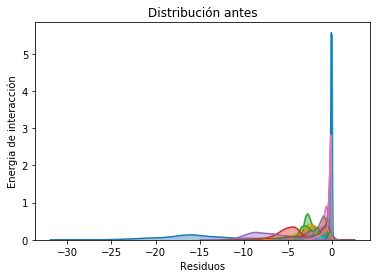

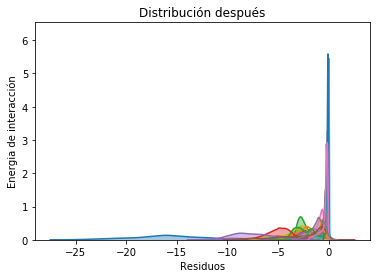

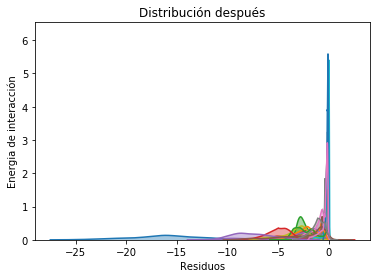

In [44]:
graficarDistribucionEnergias(f17, a)
graficarDistribucionEnergias(f17_mediana, d)
graficarDistribucionEnergias(f17_media, d)

# Datos corregidos

In [45]:
# cargar archivo con todos los datos en bruto
archivo = 'mediana_fnq_ieAll_outliersCorrection.csv'
data = pd.read_csv(archivo)

modos = ['A', 'Ap', 'B', 'Bp']
# Modos de fnq2
f02 = ExtraerLigando(data, 'f02')
f02_modos = f02.extraer_modos(modos)

# Modos de fnq10
f10 = ExtraerLigando(data, 'f10')
f10_modos = f10.extraer_modos(modos)

# Modos de fnq17
f17 = ExtraerLigando(data, 'f17')
f17_modos = f17.extraer_modos(modos)

# procesando FNQ2
f02_distancias_modos = []
distancias = ['c3a', 'c4a', 'c8a', 'c9a']

for fnq in f02_modos:
    procesar = Procesar_datos(fnq)
    for modo in distancias:
        f02_distancias_modos.append(procesar.promedio_intervalos(modo, 100))
        
# procesando FNQ10
f10_distancias_modos = []
for fnq in f10_modos:
    procesar = Procesar_datos(fnq)
    for modo in distancias:
        f10_distancias_modos.append(procesar.promedio_intervalos(modo, 100))
        
# procesando FNQ17
f17_distancias_modos = []
for fnq in f17_modos:
    procesar = Procesar_datos(fnq)
    for modo in distancias:
        f17_distancias_modos.append(procesar.promedio_intervalos(modo, 100))

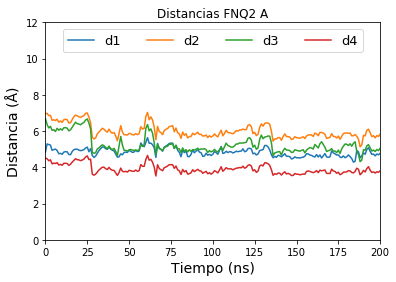

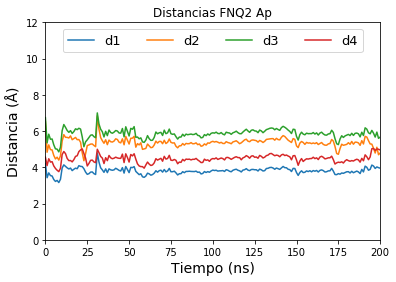

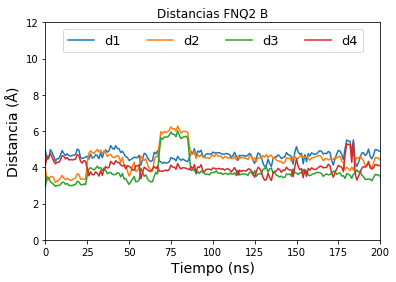

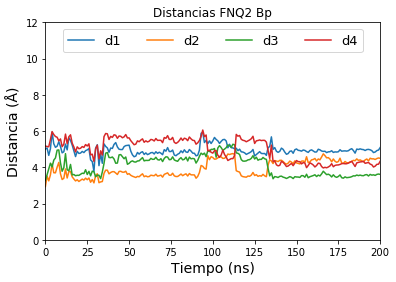

In [46]:
# Distancias a carbonos

lista_modos_f02_A = f02_distancias_modos[0:4]
graficar_distancias_modos(lista_modos_f02_A, 'Distancias FNQ2 A')

lista_modos_f02_Ap = f02_distancias_modos[4:8]
graficar_distancias_modos(lista_modos_f02_Ap, 'Distancias FNQ2 Ap')

lista_modos_f02_B = f02_distancias_modos[8:12]
graficar_distancias_modos(lista_modos_f02_B, 'Distancias FNQ2 B')

lista_modos_f02_Bp = f02_distancias_modos[12:16]
graficar_distancias_modos(lista_modos_f02_Bp, 'Distancias FNQ2 Bp')

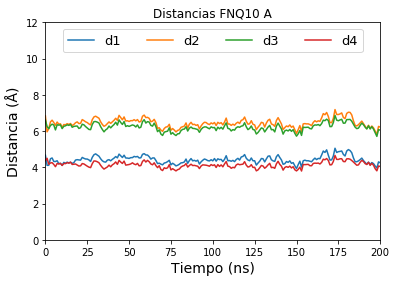

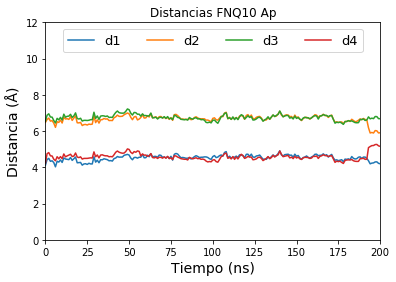

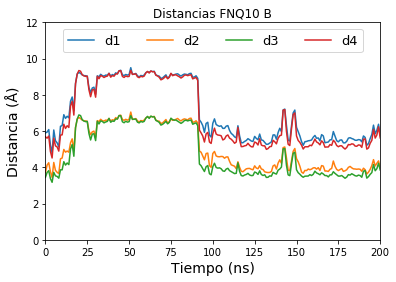

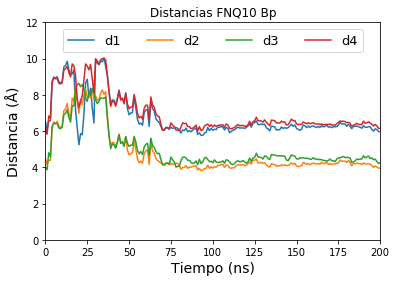

In [47]:
# Distancias a carbonos

lista_modos_f10_A = f10_distancias_modos[0:4]
graficar_distancias_modos(lista_modos_f10_A, 'Distancias FNQ10 A')

lista_modos_f10_Ap = f10_distancias_modos[4:8]
graficar_distancias_modos(lista_modos_f10_Ap, 'Distancias FNQ10 Ap')

lista_modos_f10_B = f10_distancias_modos[8:12]
graficar_distancias_modos(lista_modos_f10_B, 'Distancias FNQ10 B')

lista_modos_f10_Bp = f10_distancias_modos[12:16]
graficar_distancias_modos(lista_modos_f10_Bp, 'Distancias FNQ10 Bp')

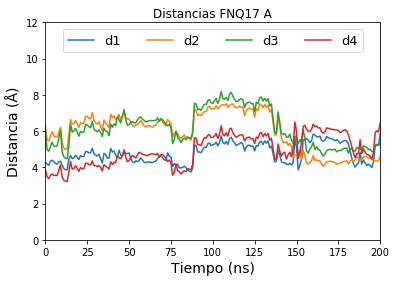

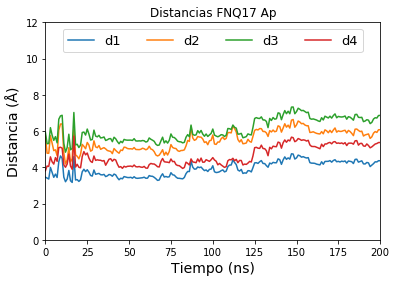

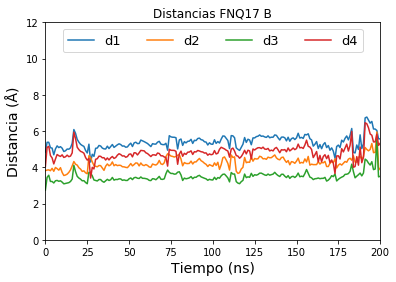

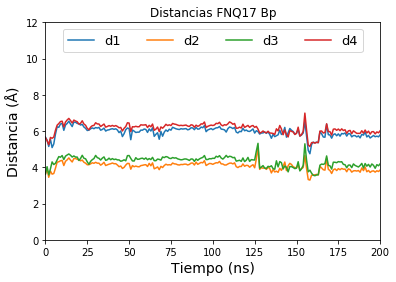

In [48]:
# Distancias a carbonos

lista_modos_f17_A = f17_distancias_modos[0:4]
graficar_distancias_modos(lista_modos_f17_A, 'Distancias FNQ17 A')

lista_modos_f17_Ap = f17_distancias_modos[4:8]
graficar_distancias_modos(lista_modos_f17_Ap, 'Distancias FNQ17 Ap')

lista_modos_f17_B = f17_distancias_modos[8:12]
graficar_distancias_modos(lista_modos_f17_B, 'Distancias FNQ17 B')

lista_modos_f17_Bp = f17_distancias_modos[12:16]
graficar_distancias_modos(lista_modos_f17_Bp, 'Distancias FNQ17 Bp')

# Boxplot con datos corregidos